In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/fastcampus_python/data/online_commerce_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      147311 non-null  int64  
 1   age              147273 non-null  float64
 2   gender           147311 non-null  int64  
 3   order_no         147311 non-null  int64  
 4   order_date       147311 non-null  object 
 5   channel          147311 non-null  object 
 6   item_category    147311 non-null  object 
 7   item_code        147311 non-null  int64  
 8   item_name        147311 non-null  object 
 9   price            147311 non-null  int64  
 10  qty              147311 non-null  int64  
 11  order_amount     147311 non-null  int64  
 12  discount_amount  147311 non-null  int64  
 13  paid_amount      147311 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 15.7+ MB


## K-means Clustering

### 각 고객의 아이템 카테고리별 구매 건수를 집계 후 Pivot Table 형태로 변환

* 행 : customer_no
* 열 : item_category
* 값 : 구매 수량 합계

In [ ]:
# 고객 단위 아이템 카테고리별 구매 건수 합계
user_item_purchase = df.groupby(['customer_no', 'item_category'])['order_no'].nunique().reset_index()
user_item_purchase.head()

,customer_no,item_category,order_no
0,2015010000596,생활가전,1
1,2015010000596,일반식품,1
2,2015010000652,일반식품,1
3,2015010001152,건강식품,1
4,2015010001152,일반식품,5


In [ ]:
# pivot table 생성
purchase_info = user_item_purchase.pivot_table(index='customer_no', columns='item_category', values='order_no', fill_value=0)
purchase_info.head()

item_category,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,생활가전,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화
customer_no,,,,,,,,,,,,,,,,,,,,,
2015010000596,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2015010000652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2015010001152,0,1,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
2015010001213,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015010001954,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# pivot table을 데이터프레임으로 변환
purchase_info = pd.DataFrame(purchase_info.to_records())
purchase_info.head()

,customer_no,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화
0,2015010000596,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2015010000652,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2015010001152,0,1,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
3,2015010001213,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015010001954,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# # 한글 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

### 데이터 표준화

In [ ]:
# customer_no 제거
purchase_info2 = purchase_info.drop('customer_no', axis = 1)
purchase_info2.head()

,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,생활가전,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# 필요한 패키지 설치 및 임포트
!pip install yellowbrick
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 스케일 표준화
StandardScaler = StandardScaler()
df_standard = StandardScaler.fit_transform(purchase_info2)

# 컬럼명 결합
df_standard = pd.DataFrame(data=df_standard, columns=purchase_info2.columns)
df_standard.head()

,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,생활가전,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화
0,-0.081169,-0.097453,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,0.531743,...,-0.236415,-0.235183,-0.007451,0.025647,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729
1,-0.081169,-0.097453,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,-0.042025,...,-0.236415,-0.235183,-0.007451,0.025647,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729
2,-0.081169,0.693364,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,-0.042025,...,-0.236415,-0.235183,-0.007451,1.566084,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729
3,-0.081169,0.693364,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,-0.042025,...,-0.236415,-0.235183,-0.007451,-0.359462,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729
4,-0.081169,-0.097453,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,-0.042025,...,-0.236415,2.872127,-0.007451,-0.359462,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729


### 기본 k-means 클러스터링 모델 생성

In [ ]:
# k-means 클러스터링 모델 생성
kmeans_model_1 = KMeans(
    init="k-means++",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=37
)

kmeans_model_1.fit(df_standard)

# 최저 SSE 값
print(kmeans_model_1.inertia_)

# 각 군집의 중심점 좌표 확인
print(kmeans_model_1.cluster_centers_)


# 반복 횟수
print(kmeans_model_1.n_iter_)

1269512.0610241585
[[ 2.49631378e-02  3.12539962e-02  4.05938320e-03 -2.64899532e-03
   1.35174207e-02 -3.55755706e-01  5.74328502e-03  5.50358754e-03
  -2.22180540e-04 -1.00610923e-03  6.14535286e-02  6.90371539e-02
  -2.35182695e-01  2.53454736e-03  1.14180269e-01  1.69045835e-02
   3.50100192e-02  1.32346770e-02 -2.12051959e-01  2.10357399e-02
   5.85619277e-02]
 [-6.38688977e-02 -8.75901295e-02 -1.51980992e-03 -4.24290184e-02
  -3.94562981e-02 -2.78584113e-01 -1.88360256e-02 -1.64840738e-02
  -1.09165252e-02 -4.05617052e-02 -1.81915423e-01 -2.03232458e-01
  -1.82337299e-01 -7.45066301e-03 -3.37193667e-01 -4.89037640e-02
  -1.09199380e-01 -3.91856892e-02  4.08217446e+00 -6.29995182e-02
  -1.62184765e-01]
 [-8.11685247e-02 -9.74529311e-02 -3.91546907e-02  4.17077076e+01
  -4.73258035e-02 -3.55922082e-01 -1.88360256e-02 -1.72508907e-02
  -1.09165252e-02  3.59228299e+01 -2.09311810e-01 -2.36414526e-01
  -2.35182695e-01 -7.45066301e-03 -2.89442044e-01  1.27244546e-01
  -1.20768104e-01 -

### 엘보우 차트 시각화

/usr/local/lib/python3.10/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.10/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


<Axes: >

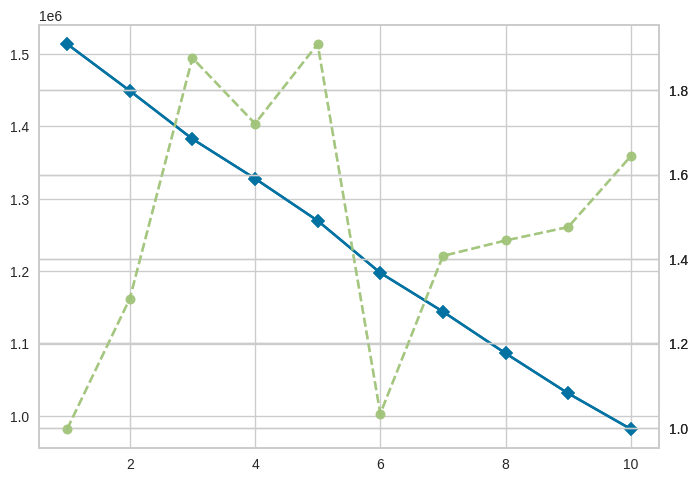

In [ ]:
# 엘보우 차트 시각화
Elbow_Chart = KElbowVisualizer(kmeans_model_1, k=(1, 11),)
Elbow_Chart.fit(df_standard)
Elbow_Chart.draw()

### 실루엣 계수 선그래프 시각화

<ipython-input-12-ee1bdd3cf290>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


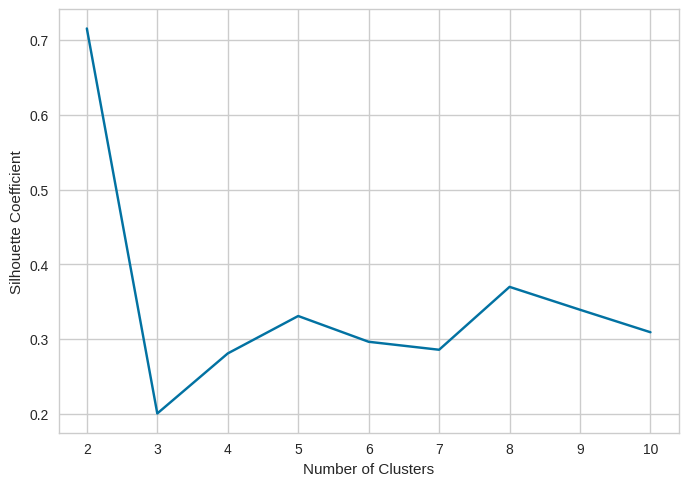

In [ ]:
# 실루엣 계수 시각화 1

# k-means 모델 설정
kmeans_model_2 = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 37,
    }

# 각 K의 실루엣 계수 저장
silhouette_coef = []

# 실루엣 계수 그래프 생성
for k in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=k, **kmeans_model_2)
    kmeans_silhouette.fit(df_standard)
    score = silhouette_score(df_standard, kmeans_silhouette.labels_)
    silhouette_coef.append(score)

plt.style.use('seaborn-whitegrid')
plt.plot(range(2,11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

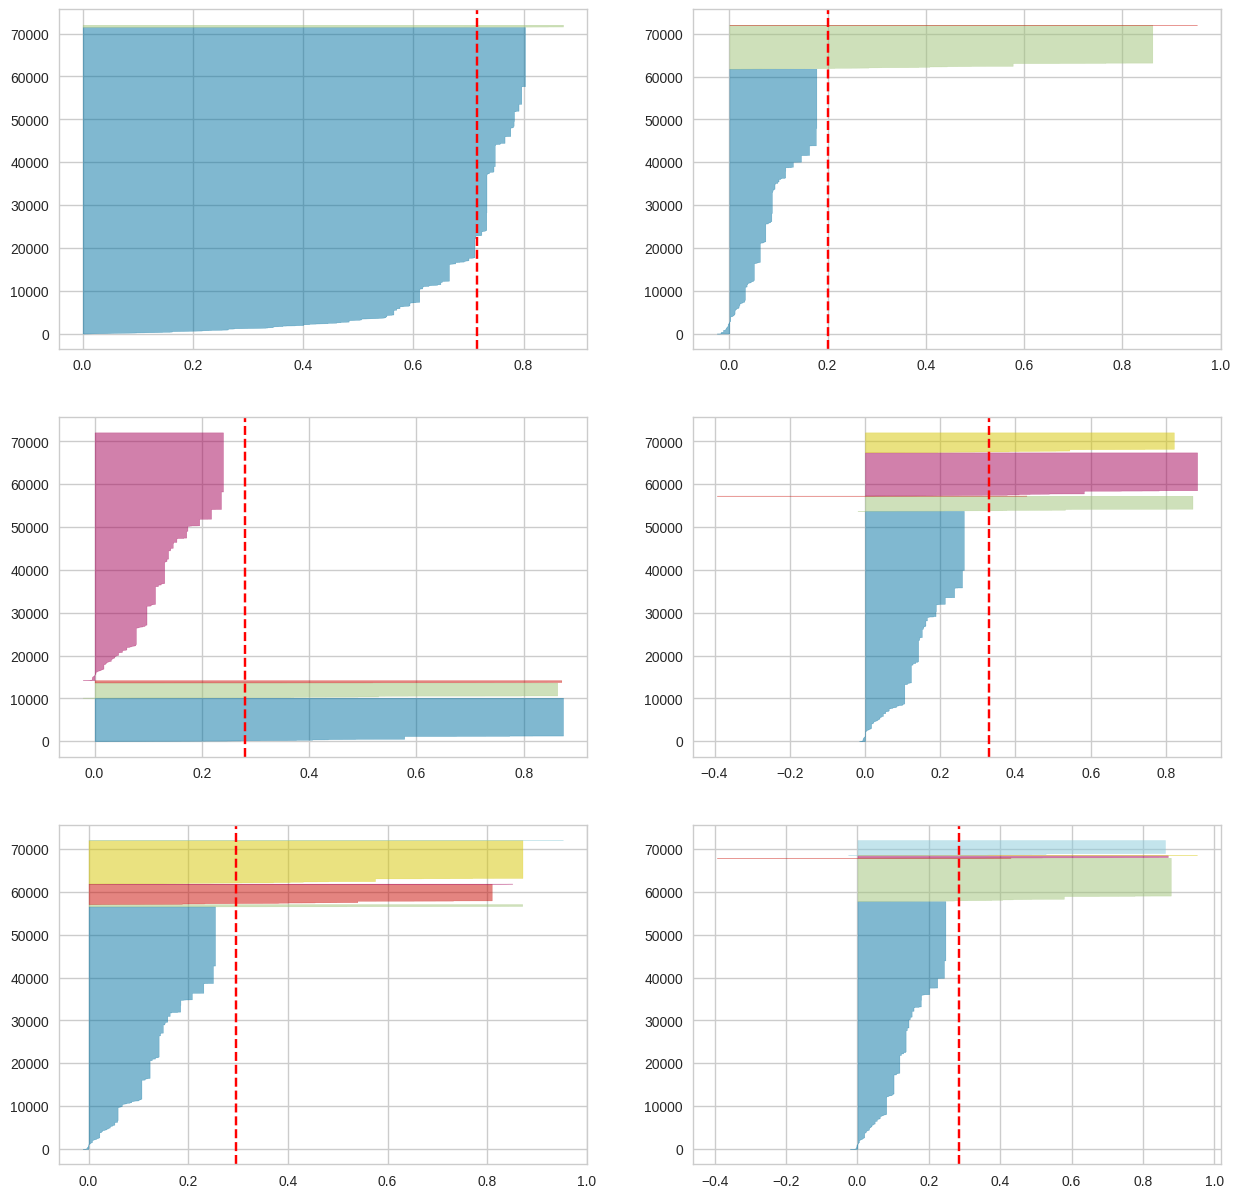

In [ ]:
# 실루엣 계수 시각화 2
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i in [2, 3, 4, 5, 6, 7]:

# k-means 클러스터링 모델 생성
    kmeans_model_3 = KMeans(n_clusters=i,
                            init="k-means++",
                            n_init=10,
                            max_iter=300,
                            random_state=37)
    q, mod = divmod(i, 2)

# 실루엣 계수 시각화
    visualizer = SilhouetteVisualizer(kmeans_model_3,
                                      colors="yellowbrick",
                                      ax=ax[q-1][mod])
    visualizer.fit(df_standard)

### 최종 Cluster 개수 적용


In [ ]:
# k-means 모델 설정
kmeans_model_4 = KMeans(
    init="k-means++",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=37)

# 군집 결합
purchase_info['cluster1'] = kmeans_model_4.fit_predict(df_standard)
purchase_info.head()

,customer_no,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,...,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화,cluster1
0,2015010000596,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
1,2015010000652,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
2,2015010001152,0,1,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,3
3,2015010001213,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,2015010001954,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3


In [ ]:
# 각 군집별 비율 확인하기
purchase_info.groupby('cluster1').customer_no.count()/purchase_info.shape[0]

cluster1
0    0.140855
1    0.049112
2    0.007327
3    0.802706
Name: customer_no, dtype: float64

In [ ]:
# 4개 클러스터 EDA
purchase_info.groupby('cluster1').agg(
    uu = ('customer_no','count'),
    가구인테리어 = ('가구/인테리어','mean'),
    건강식품 = ('건강식품','mean'),
    남성의류 = ('남성의류','mean'),
    대형가전 = ('대형가전','mean'),
    레저스포츠 = ('레저/스포츠','mean'),
    레포츠패션 = ('레포츠패션','mean'),
    반려용품 = ('반려용품','mean'),
    뷰티 = ('뷰티','mean'),
    상품권 = ('상품권','mean'),
    생활가전 = ('생활가전','mean'),
    생활용품 = ('생활용품','mean'),
    언더웨어 = ('언더웨어','mean'),
    여성의류 = ('여성의류','mean'),
    여행 = ('여행','mean'),
    일반식품 = ('일반식품','mean'),
    주방가전 = ('주방가전','mean'),
    주방용품 = ('주방용품','mean'),
    침구 = ('침구','mean'),
    캐쥬얼 = ('캐쥬얼','mean'),
    키즈유아동 = ('키즈/유아동','mean'),
    패션잡화 = ('패션잡화','mean')
)

,uu,가구인테리어,건강식품,남성의류,대형가전,레저스포츠,레포츠패션,반려용품,뷰티,상품권,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈유아동,패션잡화
cluster1,,,,,,,,,,,,,,,,,,,,,
0,10150,0.000000,0.005025,0.001281,0.000000,0.001773,1.115074,0.000099,0.003645,0.014286,...,0.015567,0.013399,0.000000,0.043941,0.000985,0.002167,0.000591,0.000985,0.000000,0.016946
1,3539,0.000000,0.012433,0.002261,0.000000,0.001695,0.039277,0.000000,0.003673,0.000000,...,0.018649,0.034473,0.000000,0.061034,0.002261,0.002261,0.000848,1.087878,0.000000,0.024866
2,528,1.089015,0.153409,0.000000,0.007576,0.009470,0.007576,0.000000,0.015152,0.000000,...,0.017045,0.009470,0.000000,0.276515,0.005682,0.015152,0.001894,0.011364,0.001894,0.018939
3,57843,0.000000,0.150476,0.002576,0.091316,0.012240,0.000121,0.001297,0.094324,0.006812,...,0.149439,0.089743,0.000069,1.148851,0.032865,0.032519,0.005135,0.000000,0.018446,0.111993


In [ ]:
cluster_df = pd.merge(df, purchase_info[['customer_no', 'cluster1']], on = 'customer_no', how='inner')
cluster_df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,cluster1
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,1
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,0
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,3
3,2019073300103,35.0,1,202105210823003,2021/05/21,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,3
4,2019073300103,35.0,1,202105294006443,2021/05/29,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,3


### 군집별 특성 파악

In [ ]:
# 카테고리별 구매 현황
## 카테고리별 요약
item_category_summary = cluster_df.groupby(['cluster1', 'item_category'])['order_no'].nunique().reset_index()
item_category_summary.head()

,cluster1,item_category,order_no
0,0,건강식품,51
1,0,남성의류,13
2,0,레저/스포츠,18
3,0,레포츠패션,11318
4,0,반려용품,1


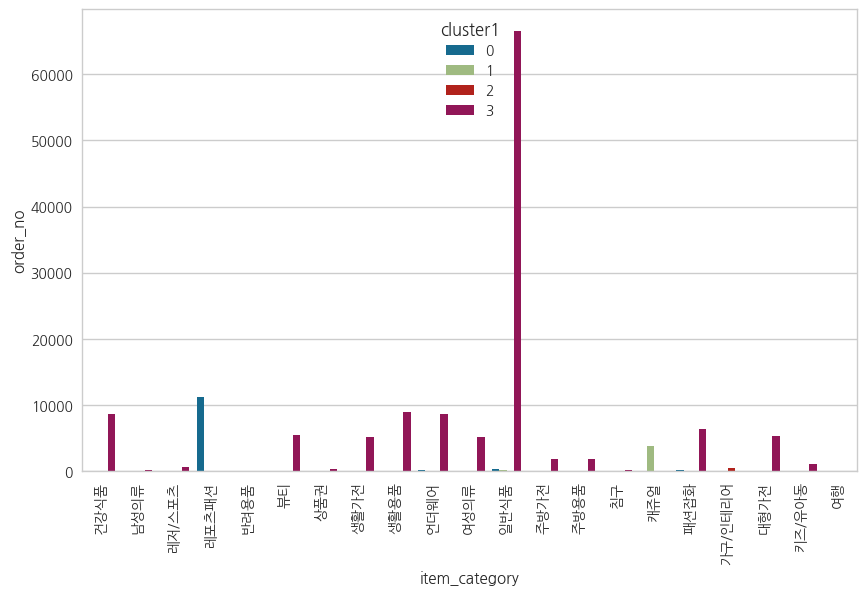

In [ ]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))

# seaborn을 사용한 방법
sns.barplot(x='item_category', y='order_no', hue='cluster1', data=item_category_summary, dodge=True)

plt.xticks(rotation=90)
plt.show()

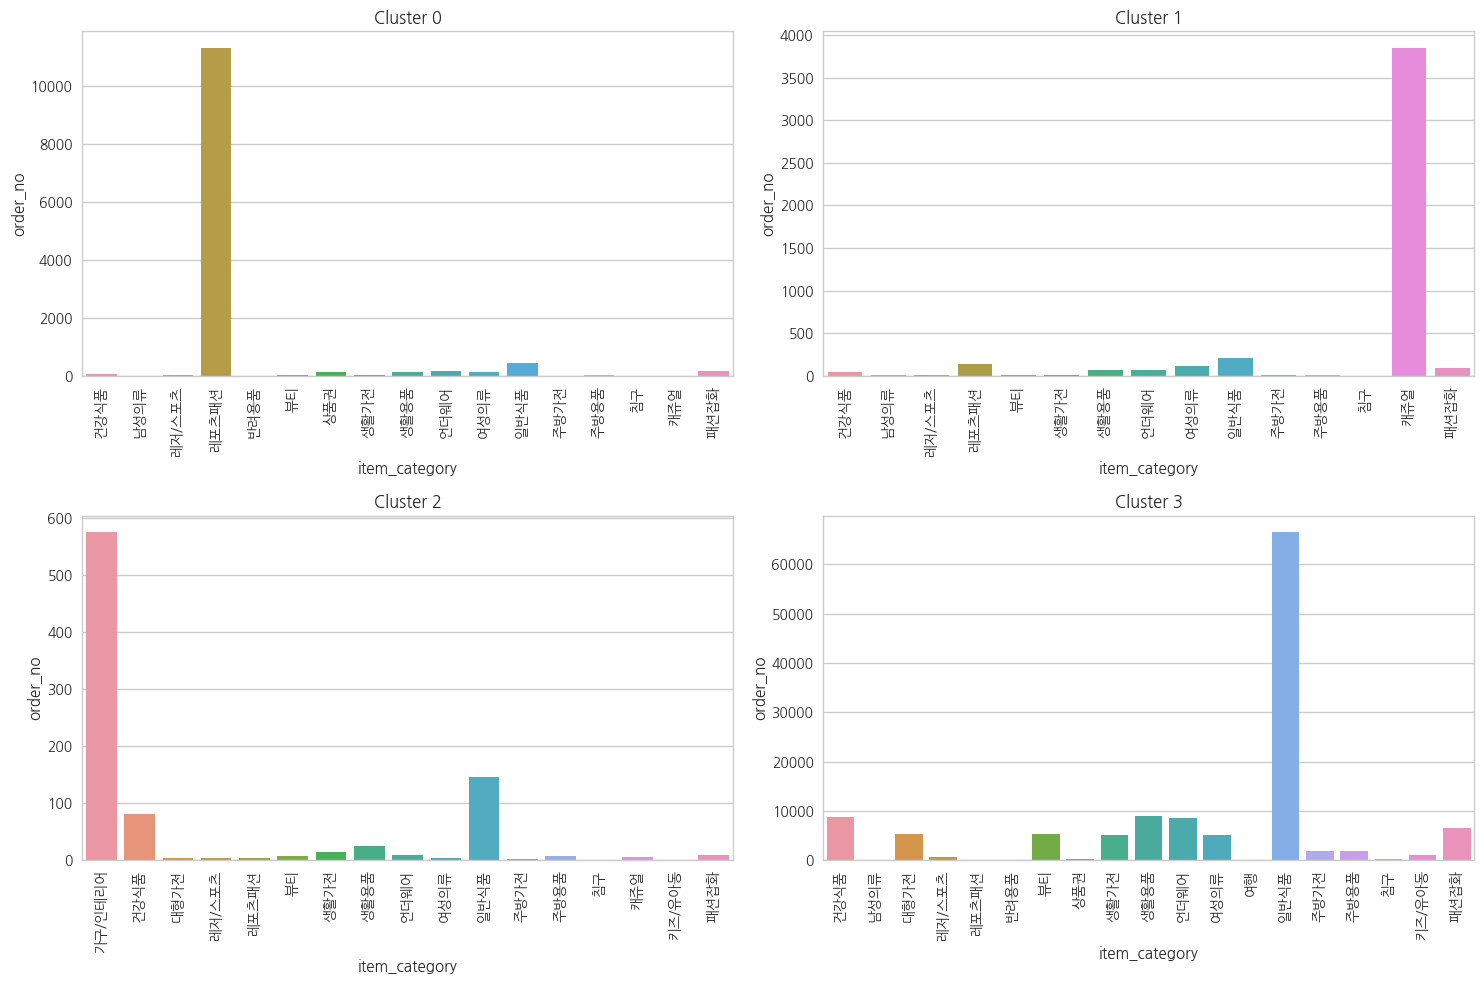

In [ ]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# subplot을 생성하고 각 cluster에 대한 bar plot을 그립니다.
plt.figure(figsize=(15, 10))

# 각 cluster에 대한 subplot을 생성합니다.
for cluster_num in item_category_summary['cluster1'].unique():
    plt.subplot(2, 2, cluster_num + 1)  # 1행 2열의 subplot 중 현재 cluster에 해당하는 subplot 선택

    # 해당 cluster에 해당하는 데이터만 추출하여 bar plot을 그립니다.
    sns.barplot(x='item_category', y='order_no', data=item_category_summary[item_category_summary['cluster1'] == cluster_num], dodge=True)

    # 각 subplot에 제목 추가
    plt.title(f'Cluster {cluster_num}')

    # x축 라벨 회전
    plt.xticks(rotation=90)

plt.tight_layout()  # subplot 간 간격 조절
plt.show()

Cluster 간 고객 수 분포는 불균형하지만, 각 Cluster별 아이템 카테고리 구매 특성을 살펴보면 아래와 같습니다.<br>
<br>
- **cluster0** : 레포츠 패션을 중심으로 구매하는 군집 (레포츠패션 선호)
- **cluster1** : 캐쥬얼 아이템 카테고리를 집중 구매하는 군집 (캐쥬얼 패션 선호형)
- **cluster2** : 가구/인테리어 카테고리를 집중 구매하는 군집 (가구인테리어+일반식품)
- **cluster3** : 일반식품 중심으로 여러 카테고리를 고루 구매하는 군집 (홈쇼핑 마니아형)

### 도메인 지식에 따른 군집 분류 적용

엘보우 차트, 실루엣 계수 등을 활용하여 **cluster** 개수를 정할 수도 있지만 분석가의 도메인 지식을 바탕으로 k개를 임의로 선정할 수 있습니다.<br>
클러스터 개수를 하나 더 늘려서 총 **6개**의 클러스터로 생성 후 군집별 특성을 파악해보겠습니다.

In [ ]:
# k-means 모델 설정
kmeans_model_5 = KMeans(
    init="k-means++",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=37)

# 군집 결합
purchase_info['cluster2'] = kmeans_model_5.fit_predict(df_standard)
purchase_info.head()

,customer_no,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,...,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화,cluster1,cluster2
0,2015010000596,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,0
1,2015010000652,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,0
2,2015010001152,0,1,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,3,0
3,2015010001213,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
4,2015010001954,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4


In [ ]:
# 각 군집별 비율 확인하기
purchase_info.groupby('cluster2').customer_no.count()/purchase_info.shape[0]

cluster2
0    0.746170
1    0.048959
2    0.000305
3    0.139828
4    0.064738
Name: customer_no, dtype: float64

In [ ]:
# 5개 클러스터 EDA
purchase_info.groupby('cluster2').agg(
    uu = ('customer_no','count'),
    가구인테리어 = ('가구/인테리어','mean'),
    건강식품 = ('건강식품','mean'),
    남성의류 = ('남성의류','mean'),
    대형가전 = ('대형가전','mean'),
    레저스포츠 = ('레저/스포츠','mean'),
    레포츠패션 = ('레포츠패션','mean'),
    반려용품 = ('반려용품','mean'),
    뷰티 = ('뷰티','mean'),
    상품권 = ('상품권','mean'),
    생활가전 = ('생활가전','mean'),
    생활용품 = ('생활용품','mean'),
    언더웨어 = ('언더웨어','mean'),
    여성의류 = ('여성의류','mean'),
    여행 = ('여행','mean'),
    일반식품 = ('일반식품','mean'),
    주방가전 = ('주방가전','mean'),
    주방용품 = ('주방용품','mean'),
    침구 = ('침구','mean'),
    캐쥬얼 = ('캐쥬얼','mean'),
    키즈유아동 = ('키즈/유아동','mean'),
    패션잡화 = ('패션잡화','mean')
)

,uu,가구인테리어,건강식품,남성의류,대형가전,레저스포츠,레포츠패션,반려용품,뷰티,상품권,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈유아동,패션잡화
cluster2,,,,,,,,,,,,,,,,,,,,,
0,53769,0.010434,0.162752,0.002604,0.068776,0.013149,0.000074,0.001376,0.100932,0.007328,...,0.159162,0.000000,0.000074,1.229891,0.035206,0.034351,0.005412,0.000000,0.019770,0.119065
1,3528,0.001701,0.012472,0.002268,0.000000,0.001701,0.034580,0.000000,0.003401,0.000000,...,0.017290,0.017007,0.000000,0.057823,0.001984,0.002551,0.000850,1.086451,0.000000,0.023243
2,22,0.000000,0.000000,0.000000,72.181818,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.181818,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000
3,10076,0.000298,0.004168,0.001092,0.000000,0.001687,1.112743,0.000099,0.003077,0.014391,...,0.014589,0.002283,0.000000,0.042378,0.000992,0.001985,0.000595,0.000992,0.000000,0.015284
4,4665,0.001072,0.009218,0.002358,0.000000,0.001501,0.027867,0.000214,0.009432,0.000000,...,0.023794,1.151340,0.000000,0.106324,0.002144,0.009218,0.001501,0.004930,0.001072,0.023580


In [ ]:
cluster_df = pd.merge(df, purchase_info[['customer_no', 'cluster2']], on = 'customer_no', how='inner')
cluster_df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,cluster2
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,1
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,3
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,0
3,2019073300103,35.0,1,202105210823003,2021/05/21,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,0
4,2019073300103,35.0,1,202105294006443,2021/05/29,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,0


In [ ]:
# 카테고리별 구매 현황
## 카테고리별 요약
item_category_summary2 = cluster_df.groupby(['cluster2', 'item_category'])['order_no'].nunique().reset_index()
item_category_summary2.head()

,cluster2,item_category,order_no
0,0,가구/인테리어,561
1,0,건강식품,8751
2,0,남성의류,140
3,0,대형가전,3698
4,0,레저/스포츠,707


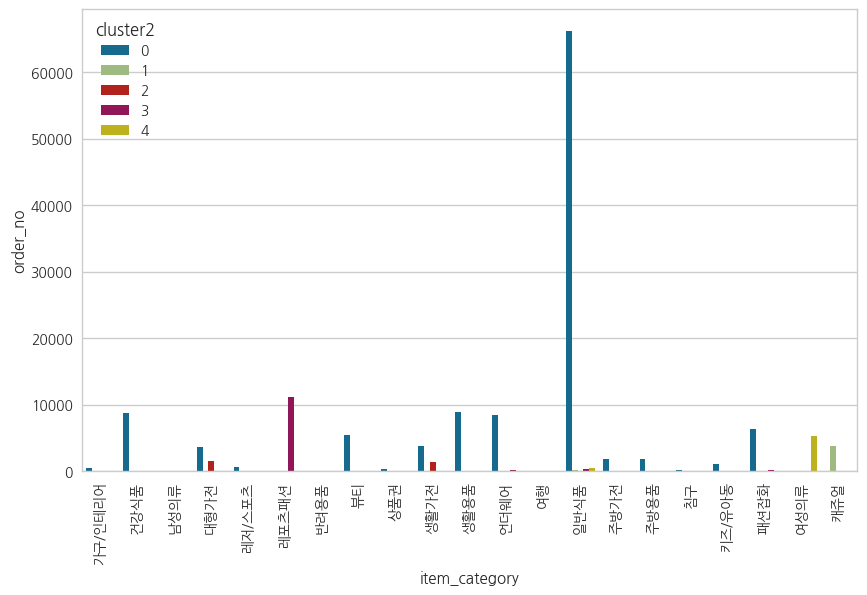

In [ ]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))

# seaborn을 사용한 방법
sns.barplot(x='item_category', y='order_no', hue='cluster2', data=item_category_summary2, dodge=True)

plt.xticks(rotation=90)
plt.show()

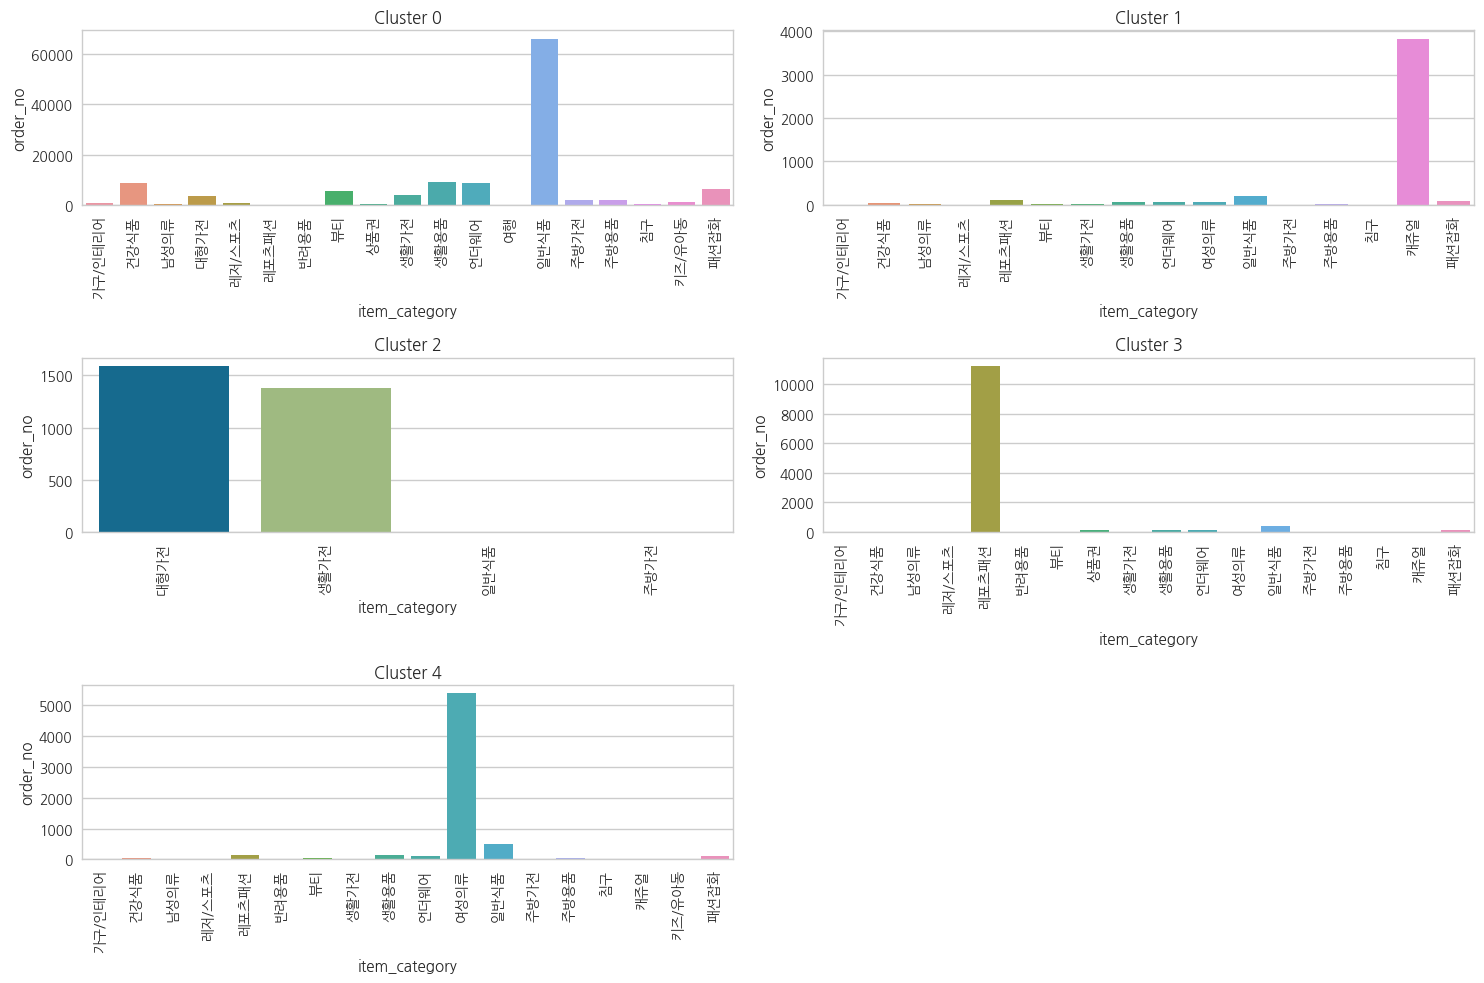

In [ ]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# subplot을 생성하고 각 cluster에 대한 bar plot을 그립니다.
plt.figure(figsize=(15, 10))

# 각 cluster에 대한 subplot을 생성합니다.
for cluster_num in item_category_summary2['cluster2'].unique():
    plt.subplot(3, 2, cluster_num + 1)  # 1행 2열의 subplot 중 현재 cluster에 해당하는 subplot 선택

    # 해당 cluster에 해당하는 데이터만 추출하여 bar plot을 그립니다.
    sns.barplot(x='item_category', y='order_no', data=item_category_summary2[item_category_summary2['cluster2'] == cluster_num], dodge=True)

    # 각 subplot에 제목 추가
    plt.title(f'Cluster {cluster_num}')

    # x축 라벨 회전
    plt.xticks(rotation=90)

plt.tight_layout()  # subplot 간 간격 조절
plt.show()

Cluster 간 고객 수 분포는 불균형하지만, 각 Cluster별 아이템 카테고리 구매 특성을 살펴보면 아래와 같습니다.<br>
<br>
- **cluster0** : 일반식품 중심으로 여러 카테고리 고루 구매하는 군집 (홈쇼핑 마니아형)
- **cluster1** : 캐쥬얼 아이템 카테고리를 집중 구매하는 군집 (캐쥬얼 패션 선호형)
- **cluster2** : 업자 군집 (가전류 대량 구매)
- **cluster3** : 레포츠/패션 카테고리를 집중 구매하는 군집 (레포츠패션 선호형)
- **cluster4** : 여성의류 카테고리 집중 구매하는 군집 (여성패션 선호형)